## Bank Loan Repayment

### Tasks
- Feature Reduction
- Classification

### Dataset

https://www.kaggle.com/kirankarri/kiran-loans
https://www.lendingclub.com/info/download-data.action

### Description

From: https://www.kaggle.com/indra90/predicting-loan-repayment

In the lending industry, investors provide loans to borrowers in exchange for the promise of repayment with interest. If the borrower repays the loan, then the lender profits from the interest. However, if the borrower is unable to repay the loan, then the lender loses money. Therefore, lenders face the problem of predicting the risk of a borrower being unable to repay a loan.

To address this problem, we will use publicly available data from LendingClub.com, a website that connects borrowers and investors over the Internet. This dataset represents 9,578 3-year loans that were funded through the LendingClub.com platform between May 2007 and February 2010. The binary dependent variable not_fully_paid indicates that the loan was not paid back in full (the borrower either defaulted or the loan was "charged off," meaning the borrower was deemed unlikely to ever pay it back).

#### Dependent Variable - 'not.fully.paid'

A binary variable indicating that the loan was not paid back in full, i.e, (the borrower either defaulted or the loan was "charged off," meaning the borrower was deemed unlikely to ever pay it back).

#### Independent Variables
  1. credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
  2. purpose: The purpose of the loan (takes values “credit_card”, “debt_consolidation”, “educational”, “major_purchase”, “small_business”, and “all_other”).
  3. int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
  4. installment: The monthly installments ($) owed by the borrower if the loan is funded.
  5. annualincome: the self-reported annual income of the borrower.
  6. log.annual.inc: The natural log of the self-reported annual income of the borrower.
  7. dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
  8. fico: The FICO credit score of the borrower.
  9. days.with.cr.line: The number of days the borrower has had a credit line.
  10. revol.bal: The borrower’s revolving balance (amount unpaid at the end of the credit card billing cycle).
  11. revol.util: The borrower’s revolving line utilization rate (the amount of the credit line used relative to total credit available).
  12. inq.last.6mths: The borrower’s number of inquiries by creditors in the last 6 months.
  13. delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
  14. pub.rec: The borrower’s number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
import pickle

%matplotlib inline

In [2]:
df = pd.read_csv('./loan-repayment/loans.csv')

df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9574 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9549 non-null float64
revol.bal            9578 non-null int64
revol.util           9516 non-null float64
inq.last.6mths       9549 non-null float64
delinq.2yrs          9549 non-null float64
pub.rec              9549 non-null float64
not.fully.paid       9578 non-null int64
dtypes: float64(9), int64(4), object(1)
memory usage: 1.0+ MB


In [4]:
# select initial data columns
target = 'not.fully.paid'
features = df.columns[df.columns != target]

# Equivalent to doing this:
#features = ['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
#       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
#       'inq.last.6mths', 'delinq.2yrs', 'pub.rec']

In [5]:
df.columns != target

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False])

In [6]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
df.columns[df.columns != target]

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec'],
      dtype='object')

## Data cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9574 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9549 non-null float64
revol.bal            9578 non-null int64
revol.util           9516 non-null float64
inq.last.6mths       9549 non-null float64
delinq.2yrs          9549 non-null float64
pub.rec              9549 non-null float64
not.fully.paid       9578 non-null int64
dtypes: float64(9), int64(4), object(1)
memory usage: 1.0+ MB


In [9]:
# preview the NaN values
df[df.isna().values]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
781,1,all_other,0.1134,98.70,10.530495,7.72,677,1680.000000,0,NaN,1.0,0.0,0.0,1
803,1,educational,0.1103,52.41,10.532096,15.84,682,1829.958333,0,NaN,0.0,0.0,0.0,0
839,1,debt_consolidation,0.1134,263.20,10.714418,8.75,682,2490.000000,0,NaN,1.0,1.0,0.0,1
857,1,debt_consolidation,0.1229,23.35,9.852194,12.38,662,1199.958333,0,NaN,1.0,0.0,0.0,0
1213,1,major_purchase,0.1064,182.39,11.264464,4.26,697,4140.958333,0,NaN,0.0,0.0,1.0,0
1280,1,credit_card,0.1633,264.91,10.819778,10.80,667,5249.958333,0,NaN,0.0,0.0,0.0,1
1553,1,all_other,0.1557,314.51,10.596535,0.00,687,2940.041667,0,NaN,1.0,0.0,0.0,0
1782,1,educational,0.1695,97.98,8.342840,0.00,687,1238.041667,0,NaN,0.0,0.0,0.0,0
1927,1,all_other,0.1379,170.38,10.714418,6.00,722,5280.041667,0,NaN,1.0,0.0,0.0,0
2008,1,all_other,0.1316,405.25,11.350407,12.01,752,3749.041667,0,NaN,0.0,0.0,0.0,0


In [10]:
# look at how many NaN values there are for each column with NaN values
for f in features:
    nan_count = df[f].isna().sum()
    if nan_count > 0:
        print(f, 'nan count:', nan_count, 'unique value count:', len(df[f].unique()))

log.annual.inc nan count: 4 unique value count: 1988
days.with.cr.line nan count: 29 unique value count: 2688
revol.util nan count: 62 unique value count: 1036
inq.last.6mths nan count: 29 unique value count: 29
delinq.2yrs nan count: 29 unique value count: 12
pub.rec nan count: 29 unique value count: 7


In [11]:
df['revol.util'].isna().sum()

62

In [12]:
len(df['revol.util'].unique())

1036

### log.annual.inc

- log.annual.inc: The natural log of the self-reported annual income of the borrower.
- nan count: 4 unique value count: 1988
- Recommendation: hard to interpolate, let's drop those rows since NaN count is low

In [13]:
index = df.loc[df['log.annual.inc'].isna()].index
index

Int64Index([7726, 7741, 7742, 7743], dtype='int64')

In [14]:
# drop the rows
df.drop(index, inplace=True)

In [15]:
# check the result
df['log.annual.inc'].isna().sum()

0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9574 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9574 non-null int64
purpose              9574 non-null object
int.rate             9574 non-null float64
installment          9574 non-null float64
log.annual.inc       9574 non-null float64
dti                  9574 non-null float64
fico                 9574 non-null int64
days.with.cr.line    9549 non-null float64
revol.bal            9574 non-null int64
revol.util           9516 non-null float64
inq.last.6mths       9549 non-null float64
delinq.2yrs          9549 non-null float64
pub.rec              9549 non-null float64
not.fully.paid       9574 non-null int64
dtypes: float64(9), int64(4), object(1)
memory usage: 1.1+ MB


### days.with.cr.line

- days.with.cr.line: The number of days the borrower has had a credit line.
- nan count: 29 unique value count: 2688
- Recommendation: inspect the NaN values to see what they can be mapped to

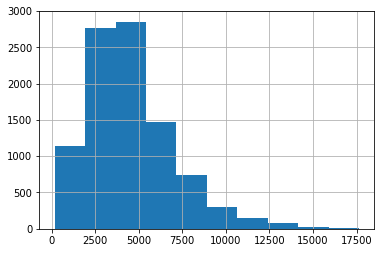

In [17]:
# see the distribution
df['days.with.cr.line'].hist()

In [18]:
df['days.with.cr.line'].median()

4139.958333

In [19]:
# There are no zero values, and median seems to be a reasonable value for days.with.cr.line

# first, select the index for the rows with days.with.cr.line=NaN
index = df[df['days.with.cr.line'].isna()].index
index

Int64Index([7725, 7727, 7728, 7729, 7731, 7732, 7733, 7734, 7735, 7736, 7737,
            7738, 7739, 7740, 7744, 7745, 7746, 7747, 7748, 7749, 7750, 7751,
            7752, 7753, 7758],
           dtype='int64')

In [20]:
# next, set the entries to 0.
# We use loc whenever we want to update rows, because it returns a view instead of a copy.

# Alternatively, safer method is to df.drop(index, inplace=True)
# because what if median is not the right value to assume?

df.loc[index, 'days.with.cr.line'] = df['days.with.cr.line'].median() 

In [21]:
# check result
df['days.with.cr.line'].isna().sum()

0

### revol.util

- revol.util: The borrower’s revolving line utilization rate (the amount of the credit line used relative to total credit available).
- nan count: 62 unique value count: 1036

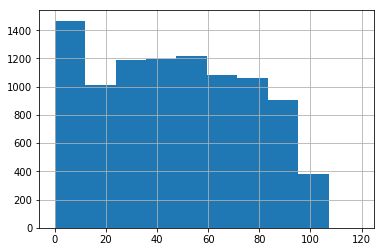

In [22]:
# see the distribution
df['revol.util'].hist()

In [23]:
# inspect the actual values
df['revol.util'].value_counts()

0.00      295
0.50       24
73.70      22
0.30       22
3.30       21
47.80      21
1.00       20
0.20       20
0.10       20
66.60      20
0.70       20
8.70       19
32.40      18
12.10      18
63.00      18
78.70      18
52.70      18
58.10      18
57.70      18
30.70      18
27.70      17
17.10      17
54.30      17
93.20      17
57.80      17
30.90      17
54.60      17
38.30      17
37.60      17
52.00      16
         ... 
104.20      1
105.20      1
0.04        1
106.10      1
58.19       1
49.63       1
103.50      1
106.50      1
33.26       1
33.29       1
36.94       1
105.30      1
103.20      1
105.70      1
102.80      1
104.30      1
6.75        1
108.80      1
106.20      1
91.40       1
103.10      1
101.50      1
69.14       1
100.60      1
26.32       1
7.28        1
100.50      1
5.34        1
106.40      1
103.90      1
Name: revol.util, Length: 1035, dtype: int64

In [24]:
# these are percentages, so they are harder to interpolate or fill
# drop these rows as their number is small

col = 'revol.util'
index = df[df[col].isna()].index
df.drop(index, inplace=True)
df[col].isna().sum()

0

### inq.last.6mths

- nan count: 29 unique value count: 29
- inq.last.6mths: The borrower’s number of inquiries by creditors in the last 6 months.

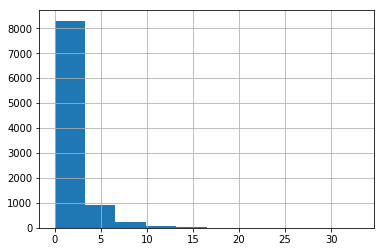

In [25]:
df['inq.last.6mths'].hist()

In [26]:
df['inq.last.6mths'].value_counts()

0.0     3622
1.0     2447
2.0     1377
3.0      857
4.0      468
5.0      273
6.0      160
7.0      100
8.0       71
9.0       47
10.0      23
11.0      15
12.0      15
15.0       9
13.0       6
14.0       6
18.0       4
16.0       3
17.0       2
19.0       2
24.0       2
28.0       1
32.0       1
33.0       1
25.0       1
31.0       1
27.0       1
20.0       1
Name: inq.last.6mths, dtype: int64

In [27]:
# harder to interpolate or fill
# drop these rows as the number of NaNs (29) is small

col = 'inq.last.6mths'
index = df[df[col].isna()].index
df.drop(index, inplace=True)
df[col].isna().sum()

0

### delinq.2yrs
- nan count: 29 unique value count: 12
- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

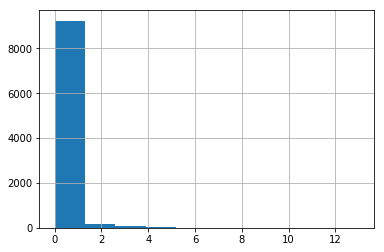

In [28]:
df['delinq.2yrs'].hist()

In [29]:
df['delinq.2yrs'].value_counts()

0.0     8403
1.0      827
2.0      191
3.0       65
4.0       18
5.0        6
6.0        2
11.0       1
13.0       1
8.0        1
7.0        1
Name: delinq.2yrs, dtype: int64

In [30]:
# harder to interpolate or fill
# drop these rows as the number of NaNs (29) is small

col = 'delinq.2yrs'
index = df[df[col].isna()].index
df.drop(index, inplace=True)
df[col].isna().sum()

0

### pub.rec
- nan count: 29 unique value count: 7
- pub.rec: The borrower’s number of derogatory public records (bankruptcy filings, tax liens, or judgments).

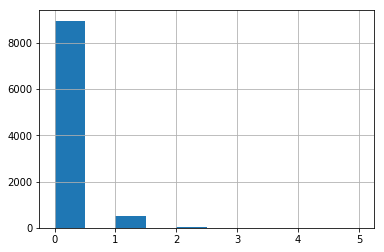

In [31]:
df['pub.rec'].hist()

In [32]:
df['pub.rec'].value_counts()

0.0    8960
1.0     530
2.0      19
3.0       5
5.0       1
4.0       1
Name: pub.rec, dtype: int64

In [33]:
# harder to interpolate or fill
# drop these rows as the number of NaNs (29) is small

col = 'pub.rec'
index = df[df[col].isna()].index
df.drop(index, inplace=True)
df[col].isna().sum()

0

In [34]:
# check result again after cleaning
for f in features:
    nan_count = df[f].isna().sum()
    if nan_count > 0:
        print(f, 'nan count:', nan_count, 'unique value count:', len(df[f].unique()))

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9516 non-null int64
purpose              9516 non-null object
int.rate             9516 non-null float64
installment          9516 non-null float64
log.annual.inc       9516 non-null float64
dti                  9516 non-null float64
fico                 9516 non-null int64
days.with.cr.line    9516 non-null float64
revol.bal            9516 non-null int64
revol.util           9516 non-null float64
inq.last.6mths       9516 non-null float64
delinq.2yrs          9516 non-null float64
pub.rec              9516 non-null float64
not.fully.paid       9516 non-null int64
dtypes: float64(9), int64(4), object(1)
memory usage: 1.1+ MB


### Encode the `purpose` category

```
purpose              9516 non-null object
```

In [36]:
df['purpose']

0       debt_consolidation
1              credit_card
2       debt_consolidation
3       debt_consolidation
4              credit_card
5              credit_card
6       debt_consolidation
7                all_other
8         home_improvement
9       debt_consolidation
10      debt_consolidation
11      debt_consolidation
12      debt_consolidation
13          small_business
14      debt_consolidation
15          major_purchase
16               all_other
17             credit_card
18      debt_consolidation
19          major_purchase
20               all_other
21               all_other
22             credit_card
23             credit_card
24      debt_consolidation
25               all_other
26               all_other
27      debt_consolidation
28               all_other
29               all_other
               ...        
9548      home_improvement
9549      home_improvement
9550             all_other
9551      home_improvement
9552    debt_consolidation
9553    debt_consolidation
9

In [37]:
df['purpose'].value_counts()

debt_consolidation    3949
all_other             2290
credit_card           1259
home_improvement       628
small_business         618
major_purchase         432
educational            340
Name: purpose, dtype: int64

In [38]:
len(df['purpose'].unique())

7

In [39]:
# Let's try label encoding, since there are quite a few columns already
le_purpose = LabelEncoder()

le_purpose.fit(df['purpose'])
print(le_purpose.classes_)

df['purpose'] = le_purpose.transform(df['purpose'])

['all_other' 'credit_card' 'debt_consolidation' 'educational'
 'home_improvement' 'major_purchase' 'small_business']


In [40]:
le_purpose.inverse_transform(df['purpose'])

array(['debt_consolidation', 'credit_card', 'debt_consolidation', ...,
       'debt_consolidation', 'home_improvement', 'debt_consolidation'],
      dtype=object)

In [41]:
df['purpose'].value_counts()

2    3949
0    2290
1    1259
4     628
6     618
5     432
3     340
Name: purpose, dtype: int64

In [42]:
# alphabetical
le_purpose.classes_

array(['all_other', 'credit_card', 'debt_consolidation', 'educational',
       'home_improvement', 'major_purchase', 'small_business'],
      dtype=object)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9516 non-null int64
purpose              9516 non-null int32
int.rate             9516 non-null float64
installment          9516 non-null float64
log.annual.inc       9516 non-null float64
dti                  9516 non-null float64
fico                 9516 non-null int64
days.with.cr.line    9516 non-null float64
revol.bal            9516 non-null int64
revol.util           9516 non-null float64
inq.last.6mths       9516 non-null float64
delinq.2yrs          9516 non-null float64
pub.rec              9516 non-null float64
not.fully.paid       9516 non-null int64
dtypes: float64(9), int32(1), int64(4)
memory usage: 1.1 MB


## Data exploration

In [44]:
df.corr()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,0.010072,-0.305427,0.053583,0.033056,-0.095762,0.354431,0.098089,-0.191655,-0.109876,-0.535595,-0.078454,-0.055030,-0.161168
purpose,0.010072,1.000000,0.114799,0.152895,0.087836,-0.055718,0.058319,0.047660,0.042139,-0.065542,0.040449,-0.011116,0.004171,0.049166
int.rate,-0.305427,0.114799,1.000000,0.276447,0.059409,0.219707,-0.716325,-0.124562,0.091873,0.463864,0.207569,0.155540,0.099486,0.159250
installment,0.053583,0.152895,0.276447,1.000000,0.449624,0.048036,0.085824,0.181684,0.230600,0.079541,-0.008553,-0.004550,-0.032962,0.050921
log.annual.inc,0.033056,0.087836,0.059409,0.449624,1.000000,-0.053660,0.111367,0.334643,0.373555,0.056112,0.028469,0.028162,0.015566,-0.029924
dti,-0.095762,-0.055718,0.219707,0.048036,-0.053660,1.000000,-0.240890,0.059707,0.189338,0.336578,0.030491,-0.022605,0.006342,0.037547
fico,0.354431,0.058319,-0.716325,0.085824,0.111367,-0.240890,1.000000,0.263290,-0.016105,-0.541113,-0.188171,-0.216540,-0.147828,-0.148909
days.with.cr.line,0.098089,0.047660,-0.124562,0.181684,0.334643,0.059707,0.263290,1.000000,0.228339,-0.024019,-0.042134,0.080811,0.071104,-0.028621
revol.bal,-0.191655,0.042139,0.091873,0.230600,0.373555,0.189338,-0.016105,0.228339,1.000000,0.203002,0.023950,-0.034246,-0.031132,0.054897
revol.util,-0.109876,-0.065542,0.463864,0.079541,0.056112,0.336578,-0.541113,-0.024019,0.203002,1.000000,-0.011377,-0.042905,0.067375,0.082041


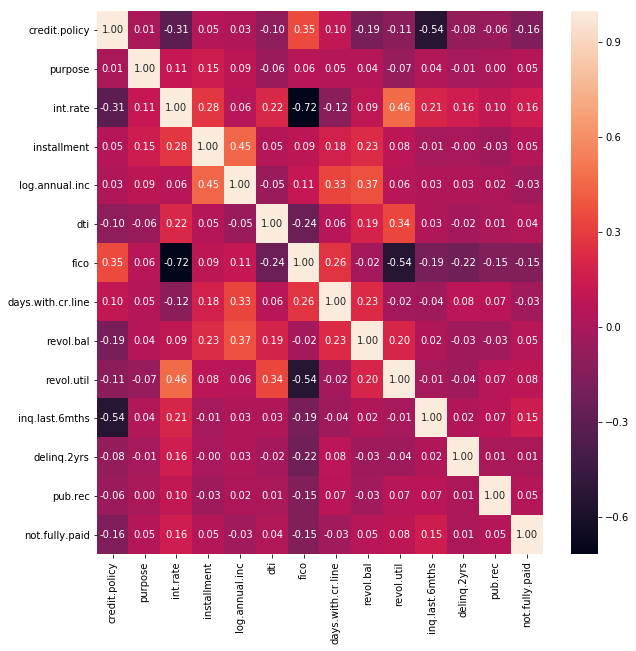

In [45]:
fig, axes = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), ax=axes, annot=True, fmt='.2f')

### Imbalance Check

Since this is a classification task, check the target value counts for imbalance. 

If imbalanced, we need to sample so that the classes (0, 1) are not skewed.

In [46]:
target

'not.fully.paid'

In [47]:
df[target].value_counts()

0    7995
1    1521
Name: not.fully.paid, dtype: int64

In [48]:
7995/(7995+1521)

0.8401639344262295

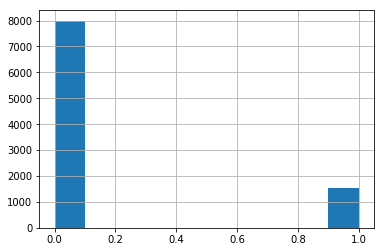

In [49]:
df[target].hist()

In [50]:
df[target].value_counts()

0    7995
1    1521
Name: not.fully.paid, dtype: int64

### Random under-sampling

Randomly select rows of the majority class (0) to match the size of minority class (1).

Note: can also try this instead of the next 3 cells:
https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler

In [51]:
df_zeros = df.loc[df[target] == 0].sample(n=2000, random_state=42)
df_zeros.shape

(2000, 14)

In [52]:
# get the rows for class=1
df_ones = df.loc[df[target] == 1]

# join the two, row-wise
df_balanced = pd.concat([df_zeros, df_ones])

# check the result
df_balanced[target].value_counts()

0    2000
1    1521
Name: not.fully.paid, dtype: int64

In [53]:
X = df_balanced.loc[:, features]  # df_balanced[features] also works, but .loc uses less memory because it does not
                                  # return a copy of the dataframe. [] returns a copy.

y = df_balanced.loc[:, target]

### Random over-sampling

Randomly duplicate rows of the minority class (1) to match the size of majority class (1).

We'll illustrate how to do this below, but not use it because the undersampled dataset is big enough for training.

Note also that test set holdout should be done **before** over-sampling. Otherwise, the test data will be included in training data.

Note: Can also try instead of the next 3 cells: https://imbalanced-learn.readthedocs.io/en/stable/generated/imblearn.over_sampling.RandomOverSampler.html#imblearn.over_sampling.RandomOverSampler

In [54]:
# set aside a portion for test before oversampling

df_ones_train, df_ones_test = train_test_split(df.loc[df[target] == 1], test_size=.1, random_state=42)
df_zeros_train, df_zeros_test = train_test_split(df.loc[df[target] == 0], test_size=.1, random_state=42)

In [55]:
# Over-sample the training set
df_ones_oversample = df_ones_train.sample(n=5000, random_state=42, replace=True)
df_balanced_oversample = pd.concat([df_zeros_train, df_ones_oversample])

X_train_oversampled = df_balanced_oversample.loc[:, features]
y_train_oversampled = df_balanced_oversample.loc[:, target]
print(X_train_oversampled.shape, y_train_oversampled.shape)
print(y_train_oversampled.value_counts())

(12195, 13) (12195,)
0    7195
1    5000
Name: not.fully.paid, dtype: int64


In [56]:
# Create the test set
df_test = pd.concat([df_ones_test, df_zeros_test])
X_test_oversampled = df_test.loc[:, features]
y_test_oversampled = df_test.loc[:, target]

print(X_test_oversampled.shape, y_test_oversampled.shape)
print(y_test_oversampled.value_counts())

(953, 13) (953,)
0    800
1    153
Name: not.fully.paid, dtype: int64


In [57]:
X.shape

(3521, 13)

### PCA plot

Let's visualise the features in a 2 or 3-D plot. This may help us get a sense of how to model the data.

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


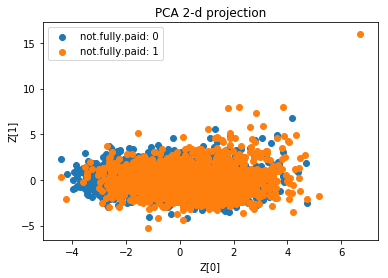

In [58]:
# scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# pca
pca_2d = PCA(n_components=2)
Z_2d = pca_2d.fit_transform(X_scaled)

fig, ax = plt.subplots()

# dimension 0, dimension 1, label
ax.scatter(Z_2d[y==0, 0], Z_2d[y==0, 1], label='not.fully.paid: 0')
ax.scatter(Z_2d[y==1, 0], Z_2d[y==1, 1], label='not.fully.paid: 1')
ax.set(title='PCA 2-d projection', xlabel='Z[0]', ylabel='Z[1]')
ax.legend()

From the plot:
- There is no clear boundary of separation, since the two classes overlap.
- The boundary of separation doesn't look linear, so an SVM classifier may perform better than Logistic Regression

This is a 2d projection, along the 2 axes of largest variances. Let's see how much variance is captured (how much we can trust the 2-d projection)

In [59]:
sum(pca_2d.explained_variance_ratio_)

0.3590119805223575

The explained variance ratio is quite low (only about 36%).

## Feature Reduction

PCA can be used for feature reduction. Let's find out what dimensions to use.

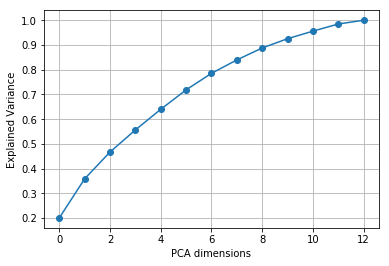

In [60]:
explained_variances = []

pca_temp = PCA(n_components=len(features))
pca_temp.fit_transform(X_scaled)
explained_variances = pca_temp.explained_variance_ratio_.cumsum()

fig, ax = plt.subplots()
ax.plot(explained_variances, marker='o')
ax.set(xlabel='PCA dimensions', ylabel='Explained Variance')
ax.grid()

10 dimensions gives us at >90% explained variance. Since this is close to the actual number of features (12), there's not that much benefit using PCA to reduce features.

## Training

In [61]:
# stratify means the dataset is split proportionally
# to the classes (y=0 or y=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

# fit a separate X_scaler on the training set only
X_scaler = StandardScaler()
X_scaler.fit(X_train)

Z_train = X_scaler.transform(X_train)
Z_test = X_scaler.transform(X_test)

C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [62]:
X_train.shape

(2640, 13)

In [63]:
X_test.shape

(881, 13)

[learning_curve] Training set sizes: [ 176  572  968 1364 1760]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished


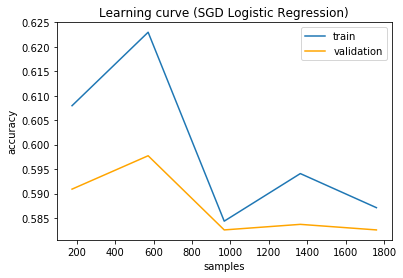

In [64]:
sgd = SGDClassifier(tol=1e-3, random_state=42)
sample_sizes, train_scores, val_scores = learning_curve(sgd, Z_train, y_train, cv=3, verbose=1, random_state=42)

fig, ax = plt.subplots()

# Note: for classification model, scores are accuracy
# (for regression model, scores are r2)
ax.plot(sample_sizes, train_scores.mean(axis=1), label='train')
ax.plot(sample_sizes, val_scores.mean(axis=1), color='orange', label='validation')
ax.set(xlabel='samples', ylabel='accuracy', title='Learning curve (SGD Logistic Regression)')
ax.legend()

[learning_curve] Training set sizes: [ 176  572  968 1364 1760]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.2s finished


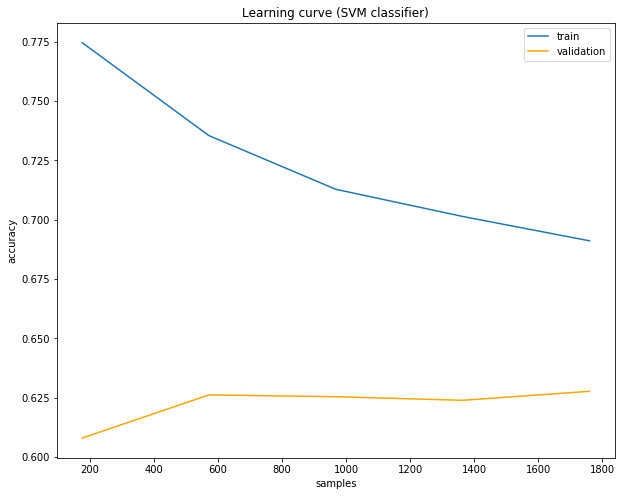

In [65]:
svc = SVC(gamma='auto', random_state=42)
sample_sizes, train_scores, val_scores = learning_curve(svc, Z_train, y_train, cv=3, verbose=1, random_state=42)

fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(sample_sizes, train_scores.mean(axis=1), label='train')
ax.plot(sample_sizes, val_scores.mean(axis=1), color='orange', label='validation')
ax.set(xlabel='samples', ylabel='accuracy', title='Learning curve (SVM classifier)')
ax.legend()

# Evaluation Metrics

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [66]:
y_true = [0, 1, 2, 2, 0]
y_pred = [0, 0, 2, 1, 0]

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       0.00      0.00      0.00         1
           2       1.00      0.50      0.67         2

   micro avg       0.60      0.60      0.60         5
   macro avg       0.56      0.50      0.49         5
weighted avg       0.67      0.60      0.59         5



              precision    recall  f1-score   support

           0       0.68      0.61      0.64       500
           1       0.55      0.61      0.58       381

   micro avg       0.61      0.61      0.61       881
   macro avg       0.61      0.61      0.61       881
weighted avg       0.62      0.61      0.62       881



[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'Prediction')]

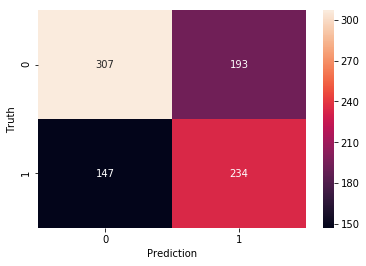

In [67]:
# Fit sgd to 1363 samples (based on learning curve)
early_stop = 1363
sgd = SGDClassifier(tol=1e-3, random_state=42)
sgd.fit(Z_train, y_train)

pred_sgd = sgd.predict(Z_test)
print(classification_report(y_test, pred_sgd))

ax = sns.heatmap(confusion_matrix(y_test, pred_sgd), annot=True, fmt='d')
ax.set(xlabel='Prediction', ylabel='Truth')

In [68]:
confusion_matrix(y_test, pred_sgd)

array([[307, 193],
       [147, 234]], dtype=int64)

              precision    recall  f1-score   support

           0       0.66      0.81      0.73       500
           1       0.65      0.46      0.54       381

   micro avg       0.66      0.66      0.66       881
   macro avg       0.66      0.64      0.63       881
weighted avg       0.66      0.66      0.65       881



[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'Prediction')]

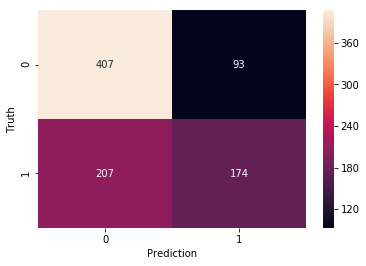

In [69]:
# fit SVM classifier on all samples (based on learning curve)
svc = SVC(gamma='auto', random_state=42)
svc.fit(Z_train, y_train)

pred_svc = svc.predict(Z_test)
print(classification_report(y_test, pred_svc))

ax = sns.heatmap(confusion_matrix(y_test, pred_svc), annot=True, fmt='d')
ax.set(xlabel='Prediction', ylabel='Truth')

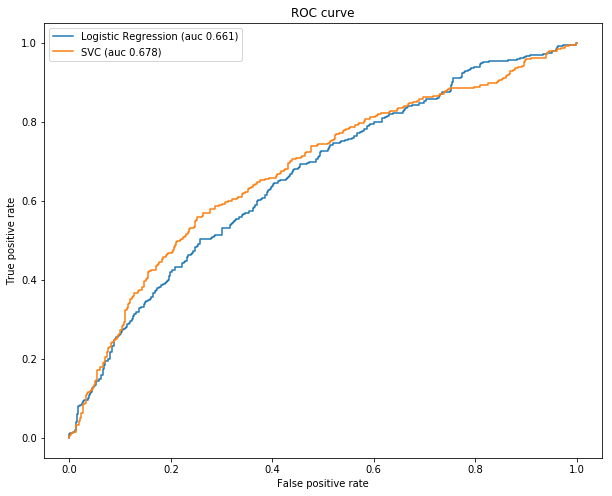

In [70]:
# Area under the curve - use for binary classifiers
prob_sgd = sgd.decision_function(Z_test)
fpr_sgd, tpr_sgd, _ = roc_curve(y_test, prob_sgd)
auc_sgd = auc(fpr_sgd, tpr_sgd)

prob_svc = svc.decision_function(Z_test)
fpr_svc, tpr_svc, _ = roc_curve(y_test, prob_svc)
auc_svc = auc(fpr_svc, tpr_svc)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(fpr_sgd, tpr_sgd, label='Logistic Regression (auc %.3f)' % auc_sgd)
ax.plot(fpr_svc, tpr_svc, label='SVC (auc %.3f)' % auc_svc)
ax.set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve')
ax.legend()

## Tuning

SVC is performing better than Logistic Regression (based on AUC and F1-scores).

Let's tune it by searching on hyperparameters.

Fitting 3 folds for each of 25 candidates, totalling 75 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=4)]: Done  75 out of  75 | elapsed:   11.1s finished


{'C': 1.0, 'gamma': 0.1}
              precision    recall  f1-score   support

           0       0.66      0.81      0.72       500
           1       0.64      0.45      0.53       381

   micro avg       0.65      0.65      0.65       881
   macro avg       0.65      0.63      0.63       881
weighted avg       0.65      0.65      0.64       881



[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'Prediction')]

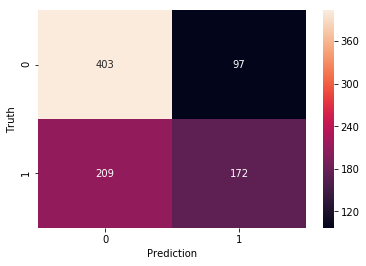

In [71]:
# SVC(C=1.0, kernel='rbf', degree=3, gamma='auto'...)

# Error penalty
# smaller = more sensitive to noise
Cs = [.001, .01, .1, 1., 10.]

# Sensitivity: RBF(x, z) = exp(−gamma * ‖x − z‖^2)
# larger = higher tendency to overfit
gammas = [.001, .01, .1, 1., 10.]

param_grid = {
    'C':Cs,
    'gamma':gammas
}

gs = GridSearchCV(SVC(random_state=42), param_grid, cv=3, verbose=True, n_jobs=4)
gs.fit(Z_train, y_train)
print(gs.best_params_)

pred_svc_tuned = gs.predict(Z_test)
print(classification_report(y_test, pred_svc_tuned))

ax = sns.heatmap(confusion_matrix(y_test, pred_svc_tuned), annot=True, fmt='d')
ax.set(xlabel='Prediction', ylabel='Truth')

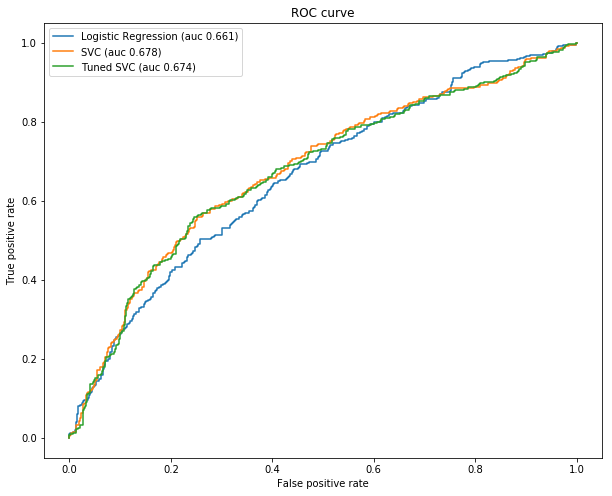

In [72]:
prob_sgd = sgd.decision_function(Z_test)
fpr_sgd, tpr_sgd, _ = roc_curve(y_test, prob_sgd)
auc_sgd = auc(fpr_sgd, tpr_sgd)

prob_svc = svc.decision_function(Z_test)
fpr_svc, tpr_svc, _ = roc_curve(y_test, prob_svc)
auc_svc = auc(fpr_svc, tpr_svc)

prob_svc_gs = gs.decision_function(Z_test)
fpr_svc_gs, tpr_svc_gs, _ = roc_curve(y_test, prob_svc_gs)
auc_svc_gs = auc(fpr_svc_gs, tpr_svc_gs)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(fpr_sgd, tpr_sgd, label='Logistic Regression (auc %.3f)' % auc_sgd)
ax.plot(fpr_svc, tpr_svc, label='SVC (auc %.3f)' % auc_svc)
ax.plot(fpr_svc_gs, tpr_svc_gs, label='Tuned SVC (auc %.3f)' % auc_svc_gs)
ax.set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve')
ax.legend()

The untuned SVC still has a higher AUC, even though its F1-score is slightly lower

## Deployment and Predictions

Inventory (what's needed for prediction):
1. X scaler
2. Model

Which model to save?
- Based on the AUC, we'll keep the original SVC model as the current best one

In [73]:
# save model for later use
pickle.dump(X_scaler, open('02_loans_X_scaler.pickle', 'wb'))
pickle.dump(svc, open('02_loans_svc.pickle', 'wb'))

In [74]:
# load model in deployment
X_scaler1 = pickle.load(open('02_loans_X_scaler.pickle', 'rb'))
svc1 = pickle.load(open('02_loans_svc.pickle', 'rb'))

# imagine we have test data
test_data = X_test[:20]
test_targets = y_test[:20]

Z_test_data = X_scaler1.transform(test_data)
y_test_pred = svc1.predict(Z_test_data)

print('Truth', test_targets.values)
print('Predictions', y_test_pred.flatten())
print('Accuracy', accuracy_score(test_targets, y_test_pred))

Truth [0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0]
Predictions [0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1]
Accuracy 0.65


C:\Users\issohl\AppData\Local\Continuum\anaconda3\envs\kml\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
